In [1]:
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [2]:
ls ../monit_npy/

nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_10/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_11/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_12/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_13/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_14/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_15/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_16/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_17/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_18/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_19/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_20/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21_WEIGHTS_SUBS[0, 10]/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21_WEIGHTS_SUBS[0, 2]/
nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21_WEIGHTS_SUBS[0, 6]/
nn_rhorho_Varia

In [3]:
filenames = [f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{i}' for i in range(2,51)]

In [4]:
def get_filename_for_class(class_num, subset=None):
    d = f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{class_num}'
    if subset:
        d += "_WEIGHTS_SUBS" + str(subset)
    return d

In [5]:
ls ../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_50

softmax_calc_w.npy   softmax_preds_w.npy


In [6]:
filenames[0]

'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_2'

In [7]:
def calculate_metrics(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    calc_w = calc_w / np.tile(np.reshape(np.sum(calc_w, axis=1), (-1, 1)), (1, num_class))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    calc_pred_argmaxs_distances = np.min(
       np.stack(
           [np.abs(pred_arg_maxs-calc_arg_maxs), (num_class - np.abs(pred_arg_maxs-calc_arg_maxs))]
       ), axis=0)
    den = np.abs(pred_arg_maxs-calc_arg_maxs)
    den[den==0]=1
    direction = (pred_arg_maxs-calc_arg_maxs)/den
    calc_pred_argmaxs_distances *= np.int32(direction)
    acc0 = (calc_pred_argmaxs_distances <= 0).mean()
    acc1 = (calc_pred_argmaxs_distances <= 1).mean()
    acc2 = (calc_pred_argmaxs_distances <= 2).mean()
    acc3 = (calc_pred_argmaxs_distances <= 3).mean()
    
    mean_error = np.mean(calc_pred_argmaxs_distances)
    l1_delta_w = np.mean(np.abs(calc_w - preds_w))
    l2_delta_w = np.sqrt(np.mean((calc_w - preds_w)**2))
    
    return np.array([acc0, acc1, acc2, acc3, mean_error, l1_delta_w, l2_delta_w])

In [8]:
metrics = [calculate_metrics(filenames[i], i+2) for i in range(49)]

In [9]:
metrics = np.stack(metrics)

# Accuracy

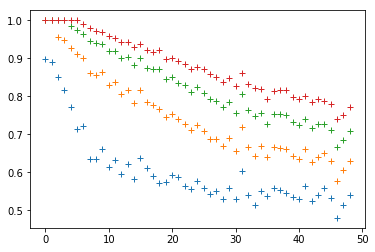

In [10]:
plt.plot(metrics[:, 0],'+')
plt.plot(metrics[:, 1],'+')
plt.plot(metrics[:, 2],'+')
plt.plot(metrics[:, 3],'+')


# MSE

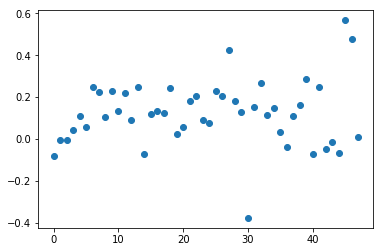

In [11]:
plt.plot(metrics[1:, 4], 'o')



# L1 Distance

Text(0,0.5,'l1')

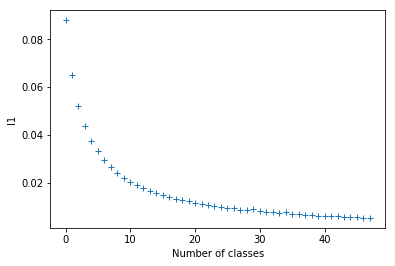

In [12]:
plt.plot(metrics[1:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 Distance

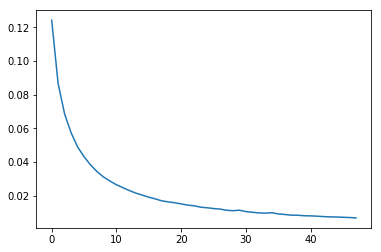

In [13]:
plt.plot(metrics[1:, 6])

# ROC AUC score

In [14]:
from sklearn.metrics import roc_auc_score
def calculate_roc_auc(pred_w, calc_w, index_a, index_b):
    n, num_classes = calc_w.shape
    true_labels = np.concatenate([np.ones(n), np.zeros(n)])
    preds = np.concatenate([pred_w[:, index_a], pred_w[:, index_a]])
    weights = np.concatenate([calc_w[:, index_a], calc_w[:, index_b]])

    return roc_auc_score(true_labels, preds, sample_weight=weights)

In [15]:
def test_roc_auc(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    for i in range(0, num_class):
         print(i, 'roc_auc: {}'.format(calculate_roc_auc(preds_w, calc_w, 0, i)), 'maxroc_auc: {}'.format(calculate_roc_auc(calc_w, calc_w, 0, i)))

In [16]:
i = 21
test_roc_auc(get_filename_for_class(i), i)

0 roc_auc: 0.49999999999999567 maxroc_auc: 0.5000000000000064
1 roc_auc: 0.5048067364824772 maxroc_auc: 0.5055437905866971
2 roc_auc: 0.5193160890064648 maxroc_auc: 0.5213842940994315
3 roc_auc: 0.542106919271242 maxroc_auc: 0.5459702471320407
4 roc_auc: 0.5709580477161167 maxroc_auc: 0.5769055838179316
5 roc_auc: 0.6030619663019495 maxroc_auc: 0.6111799506498055
6 roc_auc: 0.6352933285011289 maxroc_auc: 0.6454566069027339
7 roc_auc: 0.6645083290751571 maxroc_auc: 0.6763920917949123
8 roc_auc: 0.687848152201201 maxroc_auc: 0.7009590049115344
9 roc_auc: 0.7030184242088673 maxroc_auc: 0.7167420249191476
10 roc_auc: 0.7085174844611754 maxroc_auc: 0.72217833564523
11 roc_auc: 0.7037897456394488 maxroc_auc: 0.7167174215865095
12 roc_auc: 0.6892867054269389 maxroc_auc: 0.7008819935460375
13 roc_auc: 0.6664270908353371 maxroc_auc: 0.6762213760598018
14 roc_auc: 0.6374583547421923 maxroc_auc: 0.6451601543254943
15 roc_auc: 0.6052329275373992 maxroc_auc: 0.6107567659019254
16 roc_auc: 0.5729225

In [17]:
i = 21
test_roc_auc(get_filename_for_class(i), i)

0 roc_auc: 0.49999999999999567 maxroc_auc: 0.5000000000000064
1 roc_auc: 0.5048067364824772 maxroc_auc: 0.5055437905866971
2 roc_auc: 0.5193160890064648 maxroc_auc: 0.5213842940994315
3 roc_auc: 0.542106919271242 maxroc_auc: 0.5459702471320407
4 roc_auc: 0.5709580477161167 maxroc_auc: 0.5769055838179316
5 roc_auc: 0.6030619663019495 maxroc_auc: 0.6111799506498055
6 roc_auc: 0.6352933285011289 maxroc_auc: 0.6454566069027339
7 roc_auc: 0.6645083290751571 maxroc_auc: 0.6763920917949123
8 roc_auc: 0.687848152201201 maxroc_auc: 0.7009590049115344
9 roc_auc: 0.7030184242088673 maxroc_auc: 0.7167420249191476
10 roc_auc: 0.7085174844611754 maxroc_auc: 0.72217833564523
11 roc_auc: 0.7037897456394488 maxroc_auc: 0.7167174215865095
12 roc_auc: 0.6892867054269389 maxroc_auc: 0.7008819935460375
13 roc_auc: 0.6664270908353371 maxroc_auc: 0.6762213760598018
14 roc_auc: 0.6374583547421923 maxroc_auc: 0.6451601543254943
15 roc_auc: 0.6052329275373992 maxroc_auc: 0.6107567659019254
16 roc_auc: 0.5729225

## Baseline

In [18]:
i = 21
subset = [0,6] # Run with option --WEIGHTS_SUBSET [0,6]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999933 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.6639896560945292 maxroc_auc: 0.6454566069027331


In [19]:
i = 21
subset = [0,10] # Run with option --WEIGHTS_SUBSET [0,10]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.5000000000000063 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.701805957934322 maxroc_auc: 0.7221783356452286


In [20]:
i = 21
subset = [0,2] # Run with option --WEIGHTS_SUBSET [0,2]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999986 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.5568512762550901 maxroc_auc: 0.521384294099431


In [21]:
i = 21
subset = [0,8] # Run with option --WEIGHTS_SUBSET [0,8]
test_roc_auc(get_filename_for_class(i, subset), 2)

0 roc_auc: 0.4999999999999992 maxroc_auc: 0.5000000000000052
1 roc_auc: 0.6897154024886555 maxroc_auc: 0.7009590049115341


# Accuracy distance

In [42]:
def plot_distr(directory, num_class):
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    distances_in_both_directions = np.stack(
        [(pred_arg_maxs-calc_arg_maxs), (num_class+pred_arg_maxs-calc_arg_maxs-1), (-num_class+pred_arg_maxs-calc_arg_maxs+1)], axis=0)
    choice_of_direction = np.argmin(np.abs(distances_in_both_directions), axis=0)
    distances_in_both_directions[choice_of_direction] 
    plt.hist(calc_pred_argmaxs_distances, bins=num_class+1, histtype='step')
    plt.xlabel('Prediction error distance')
    

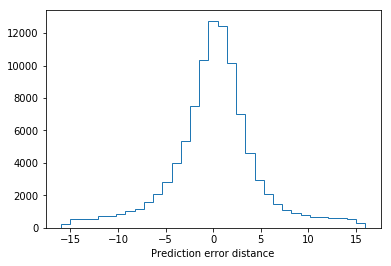

In [43]:
i = 30
plot_distr(filenames[i], i+2)

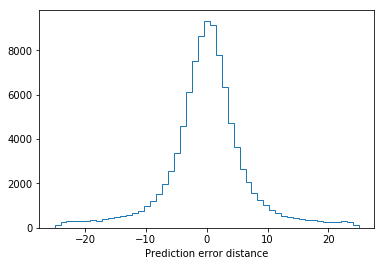

In [44]:
i = 48
plot_distr(filenames[i], i+2)

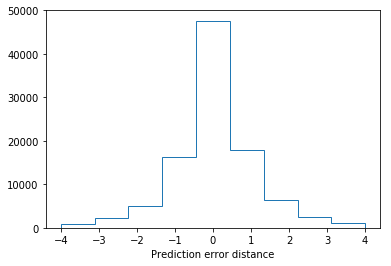

In [45]:
i = 6
plot_distr(filenames[i], i+2)

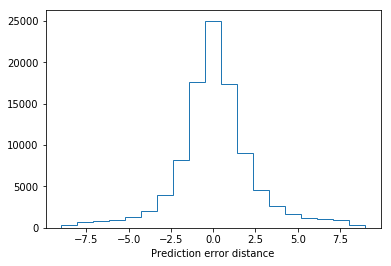

In [46]:
i = 16
plot_distr(filenames[i], i+2)